<a href="https://colab.research.google.com/github/bruno-sl15/-QuarentenaDados-Alura/blob/master/Aprendizado_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.utils import resample
from scipy.stats import randint

caminho = '/content/drive/My Drive/microdados_enem_2019/DADOS_TRATADOS_QUANTIL.csv'
dados_pe = pd.read_csv(caminho)

In [ ]:
dados_pe.head()

,NO_REGIAO_RESIDENCIA,NO_REGIAO_NASCIMENTO,NU_IDADE,TP_COR_RACA,TP_ANO_CONCLUIU,Q001,Q002,Q003,Q004,Q005,Q006,TP_MEDIA,NU_MEDIA
0,Zona da Mata,Região Metropolitana,21,0,4,E,H,F,F,6,E,A,701.82
1,Sertão,Sertão,23,3,5,E,C,A,A,4,B,D,437.34
2,Sertão,Sertão,19,2,2,E,C,B,A,6,C,A,655.60
3,São Francisco,Outro,25,3,6,H,B,A,A,4,B,B,526.34
4,Sertão,Outro,16,1,0,C,F,D,D,5,D,A,651.76


In [ ]:
# Extração de amostra

seed = 43278
np.random.seed(seed)

amostra = dados_pe.sample(frac = 0.05)
amostra.shape

(10138, 13)

# Normalização e Codificação dos dados (LabelEncoder e OneHotEncoder)

In [ ]:
# separação entre classe e atributos
y = amostra['TP_MEDIA'].values
X = amostra.drop(['TP_MEDIA', 'NU_MEDIA'], axis=1).values

In [ ]:
# Aplição do Label Encoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0]) # NO_REGIAO_RESIDENCIA
X[:, 1] = le.fit_transform(X[:, 1]) # NO_REGIAO_NASCIMENTO
X[:, 5] = le.fit_transform(X[:, 5]) # Q001
X[:, 6] = le.fit_transform(X[:, 6]) # Q002
X[:, 7] = le.fit_transform(X[:, 7]) # Q003
X[:, 8] = le.fit_transform(X[:, 8]) # Q004
X[:, 10] = le.fit_transform(X[:, 10]) # Q006

In [ ]:
# Atributos para usar o OneHotEncoder:
# NO_REGIAO_RESIDENCIA
# NO_REGIAO_NASCIMENTO
# TP_COR_RACA
# Q003
# Q004
ohe = X[:, np.r_[0,1,3,7,8]]

In [ ]:
# Atributos para normalizar
X = X[:, np.r_[2,4,5,6,9,10]]
X.shape

(10138, 6)

In [ ]:
X[0:5]

array([[42, 13, 1, 2, 5, 1],
       [39, 13, 0, 0, 3, 2],
       [18, 0, 4, 4, 4, 4],
       [17, 0, 1, 5, 4, 0],
       [18, 1, 4, 4, 4, 3]], dtype=object)

In [ ]:
# Aplicação da normalização [0, 1]
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X[0:5]

array([[0.55172414, 1.        , 0.14285714, 0.28571429, 0.21052632,
        0.0625    ],
       [0.5       , 1.        , 0.        , 0.        , 0.10526316,
        0.125     ],
       [0.13793103, 0.        , 0.57142857, 0.57142857, 0.15789474,
        0.25      ],
       [0.12068966, 0.        , 0.14285714, 0.71428571, 0.15789474,
        0.        ],
       [0.13793103, 0.07692308, 0.57142857, 0.57142857, 0.15789474,
        0.1875    ]])

In [ ]:
# Aplicação do OneHotEncoder
enc = OneHotEncoder()
enc.fit(ohe)
enc = enc.transform(ohe).toarray()
enc.shape

(10138, 29)

In [ ]:
# Concatena colunas normalizadas + colunas OHE
X = np.concatenate((X,enc),axis=1)
X.shape

(10138, 35)

# Preparação dos dados para o RandomizedSearchCV

In [ ]:
# divisão entre treino/validação e teste
X, X_test, y, y_test = train_test_split(X, y, test_size=0.10, random_state=24, stratify=y)

In [ ]:
# insere os indexes de X
l = []
for i in range(len(X)):
  l.append([i] + list(X[i]))
X = np.array(l)

In [ ]:
# insere os indexes de y
l = []
for i in range(len(y)):
  l.append([i, y[i]])
y = np.array(l)

In [ ]:
X

array([[0.00000000e+00, 1.03448276e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.89655172e-01, 2.30769231e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.37931034e-01, 7.69230769e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.12100000e+03, 6.55172414e-01, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.12200000e+03, 1.37931034e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.12300000e+03, 1.37931034e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
y

array([['0', 'B'],
       ['1', 'C'],
       ['2', 'C'],
       ...,
       ['9121', 'C'],
       ['9122', 'B'],
       ['9123', 'B']], dtype='<U21')

In [ ]:
# Divisão entre treino e validação
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.10, random_state=24)

In [ ]:
def get_indexes(a):
  indexes = []
  for i in a:
    indexes.append(int(i[0]))
  return [indexes]

In [ ]:
train_indexes = get_indexes(X_train)
validation_indexes = get_indexes(X_validation)
cv_iter = zip(train_indexes, validation_indexes)

In [ ]:
def drop_indexes(a):
  matrix = []
  for i in a:
    matrix.append(i[1:])
  return np.array(matrix)

In [ ]:
X = drop_indexes(X)
y = drop_indexes(y)
X_train = drop_indexes(X_train)
y_train = drop_indexes(y_train)
X_validation = drop_indexes(X_validation)
y_validation = drop_indexes(y_validation)

# Função de Hypertuning

In [ ]:
def hypertuning(est, p_distr, nbr_iter, cv_iter, X, y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=cv_iter,
                                   verbose=1000)
    rdmsearch.fit(X,y)
    best_params = rdmsearch.best_params_
    best_score = rdmsearch.best_score_
    return best_params, best_score

# RandomizedSearchCV - RandomForest

In [ ]:
# Definição da matriz de parâmetros da Random Forest

rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,35),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

rf_p_dist

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [3, 5, 10, None],
 'max_features': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f63c5c27780>,
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f63c5c270b8>,
 'n_estimators': [10, 100, 200, 300, 400, 500]}

In [ ]:
# RandomizedSearch do Random Forest

est_RF = RandomForestClassifier(n_jobs=-1, random_state=24)
best_parameters, best_score = hypertuning(est_RF, rf_p_dist, 100, cv_iter, X, y)

In [ ]:
best_parameters

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 26,
 'min_samples_leaf': 3,
 'n_estimators': 300}

In [ ]:
best_score

0.4184008762322015

# Treinamento RandomForest

In [ ]:
# Criação e treinamento com Random Forest
floresta = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=None,
                                  max_features=26, min_samples_leaf=3, n_estimators=300,
                                  random_state=24)
floresta.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=26,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=24, verbose=0,
                       warm_start=False)

In [ ]:
previsao_RF = floresta.predict(X_test)
precisao_RF = accuracy_score(y_test, previsao_RF)
matriz_confusao_RF = confusion_matrix(y_test, previsao_RF)
cr_RF = classification_report(y_test, previsao_RF)
print(precisao_RF)
print(matriz_confusao_RF)
print(cr_RF)

0.3806706114398422
[[144  46  41  24]
 [ 69  59  53  69]
 [ 41  66  60  81]
 [ 28  49  61 123]]
              precision    recall  f1-score   support

           A       0.51      0.56      0.54       255
           B       0.27      0.24      0.25       250
           C       0.28      0.24      0.26       248
           D       0.41      0.47      0.44       261

    accuracy                           0.38      1014
   macro avg       0.37      0.38      0.37      1014
weighted avg       0.37      0.38      0.37      1014



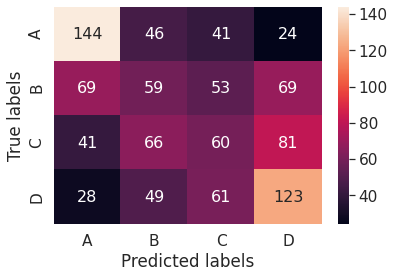

In [ ]:
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(matriz_confusao_RF, annot=True, annot_kws={"size": 16}, fmt='g') # font size
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['A','B','C','D']); ax.yaxis.set_ticklabels(['A','B','C','D'])
plt.show()

# RandomizedSearchCV - SVM

In [ ]:
# Definição da matriz de parâmetros do SVM

svm_p_dist={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernel':['rfb', 'linear', 'poly', 'sigmoid'],
              'degree':[2, 3, 4],
              'gamma':['scale','auto'],
              }

svm_p_dist

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'degree': [2, 3, 4],
 'gamma': ['scale', 'auto'],
 'kernel': ['rfb', 'linear', 'poly', 'sigmoid']}

In [ ]:
# RandomizedSearch do SVM

est_SVM = svm.SVC(decision_function_shape='ovo', random_state=24)
best_parameters, best_score = hypertuning(est_SVM, svm_p_dist, 100, cv_iter, X, y)

In [ ]:
best_parameters

{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
best_score

0.39978094194961666

# Treinamento SVM

In [ ]:
# Criação e treinamento com SVM
svm_clf = svm.SVC(decision_function_shape='ovo', C=100, kernel='poly',
                  degree=2, gamma='scale', random_state=24)
svm_clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=24, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
1'previsao_SVM = svm_clf.predict(X_test)
precisao_SVM = accuracy_score(y_test, previsao_SVM)
matriz_confusao_SVM = confusion_matrix(y_test, previsao_SVM)
cr_SVM = classification_report(y_test, previsao_SVM)
print(precisao_SVM)
print(matriz_confusao_SVM)
print(cr_SVM)

0.3895463510848126
[[143  40  30  42]
 [ 73  70  44  63]
 [ 50  49  54  95]
 [ 28  43  62 128]]
              precision    recall  f1-score   support

           A       0.49      0.56      0.52       255
           B       0.35      0.28      0.31       250
           C       0.28      0.22      0.25       248
           D       0.39      0.49      0.43       261

    accuracy                           0.39      1014
   macro avg       0.38      0.39      0.38      1014
weighted avg       0.38      0.39      0.38      1014



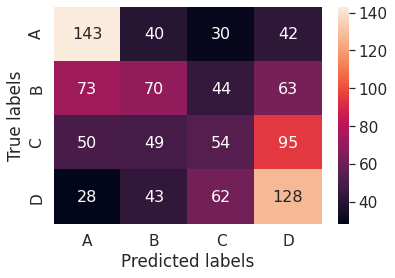

In [ ]:
ax= plt.subplot()
sns.set(font_scale=1.4) # for label size
sns.heatmap(matriz_confusao_SVM, annot=True, annot_kws={"size": 16}, fmt='g') # font size
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['A','B','C','D']); ax.yaxis.set_ticklabels(['A','B','C','D'])
plt.show()